From: https://w.wiki/6a6J 

Wikidata link: [http://www.wikidata.org/entity/Q27978235](http://www.wikidata.org/entity/Q27978235)

Title: Summer (with Sacrifice of Isaac)

Creator: Francesco Bassano the Younger



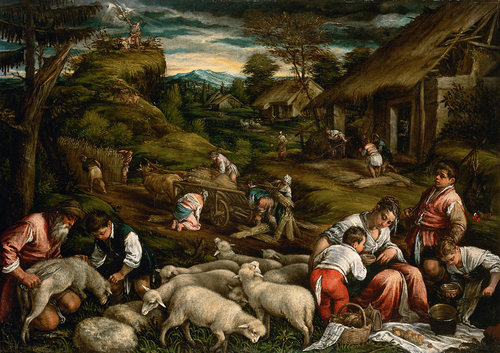




Wikidata link: [http://www.wikidata.org/entity/Q27978238](http://www.wikidata.org/entity/Q27978238)

Title: Autumn with Moses receiving the Ten Commandments

Creator: Francesco Bassano the Younger



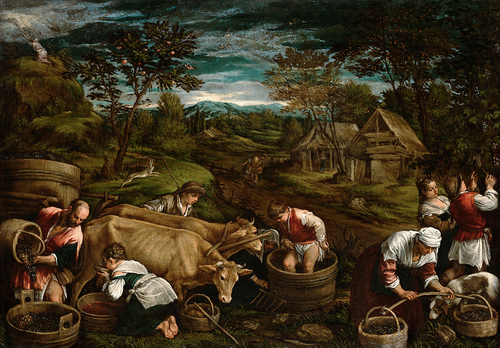




Wikidata link: [http://www.wikidata.org/entity/Q27978239](http://www.wikidata.org/entity/Q27978239)

Title: Mocking of Christ

Creator: Francesco Bassano the Younger



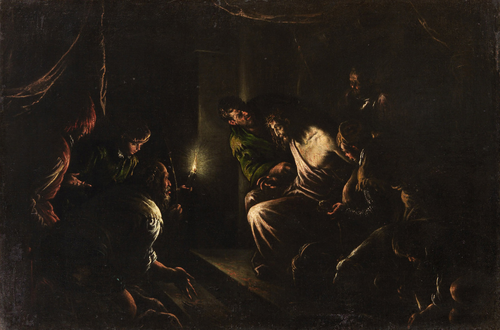




Wikidata link: [http://www.wikidata.org/entity/Q27978241](http://www.wikidata.org/entity/Q27978241)

Title: Portrait of man with sun clock and astrolabium

Creator: Francesco Bassano the Younger



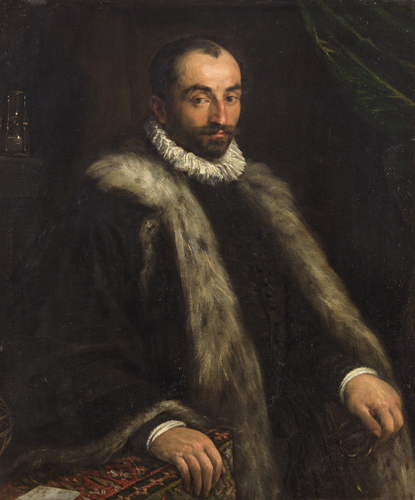




Wikidata link: [http://www.wikidata.org/entity/Q27978242](http://www.wikidata.org/entity/Q27978242)

Title: Q27978242

Creator: Francesco Bassano the Younger



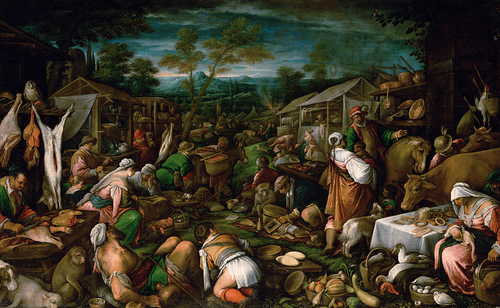




Wikidata link: [http://www.wikidata.org/entity/Q27978244](http://www.wikidata.org/entity/Q27978244)

Title: Q27978244

Creator: Francesco Bassano the Younger



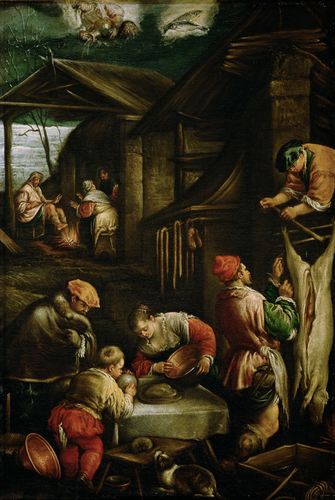




Wikidata link: [http://www.wikidata.org/entity/Q27978246](http://www.wikidata.org/entity/Q27978246)

Title: Summer (June, July, August)

Creator: Francesco Bassano the Younger



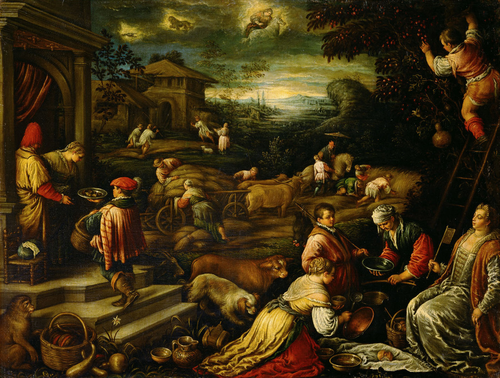




Wikidata link: [http://www.wikidata.org/entity/Q27978247](http://www.wikidata.org/entity/Q27978247)

Title: Q27978247

Creator: Francesco Bassano the Younger



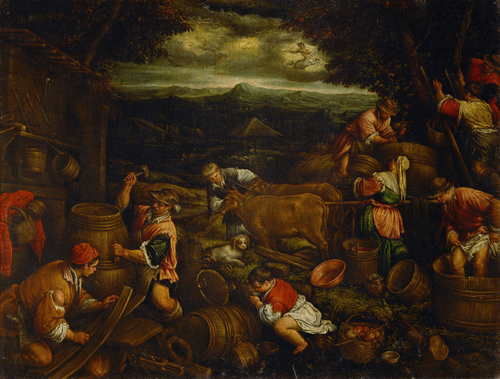




Wikidata link: [http://www.wikidata.org/entity/Q27978248](http://www.wikidata.org/entity/Q27978248)

Title: Q27978248

Creator: Francesco Bassano the Younger



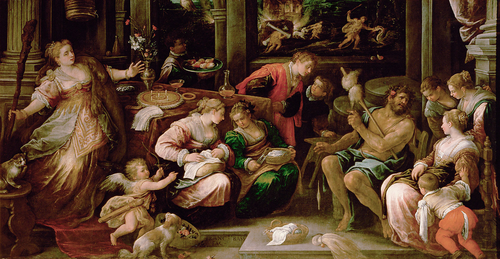




Wikidata link: [http://www.wikidata.org/entity/Q27978249](http://www.wikidata.org/entity/Q27978249)

Title: Adoration of the Magi

Creator: Francesco Bassano the Younger



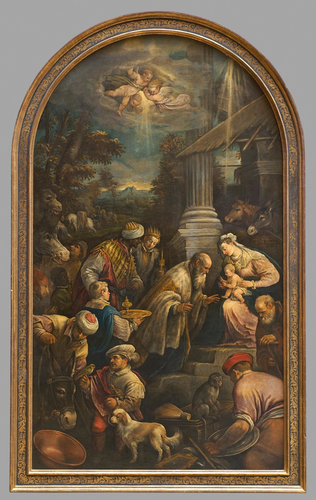




Wikidata link: [http://www.wikidata.org/entity/Q27978253](http://www.wikidata.org/entity/Q27978253)

Title: Q27978253

Creator: Francesco Bassano the Younger



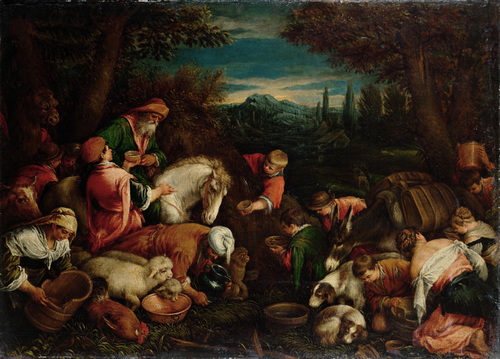




Wikidata link: [http://www.wikidata.org/entity/Q27978258](http://www.wikidata.org/entity/Q27978258)

Title: Q27978258

Creator: Girolamo da Ponte



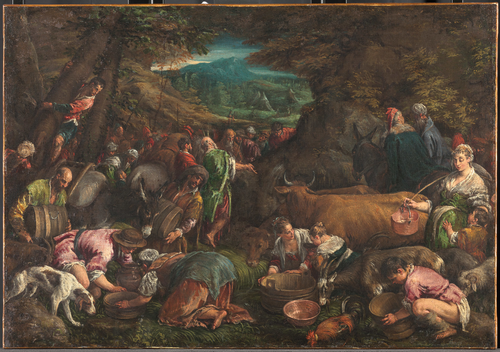




Wikidata link: [http://www.wikidata.org/entity/Q27978260](http://www.wikidata.org/entity/Q27978260)

Title: Q27978260

Creator: Girolamo da Ponte



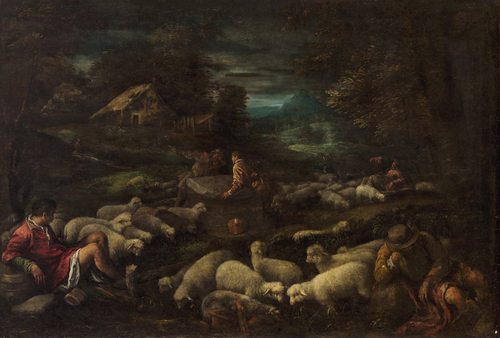




Wikidata link: [http://www.wikidata.org/entity/Q27978261](http://www.wikidata.org/entity/Q27978261)

Title: Q27978261

Creator: Girolamo da Ponte



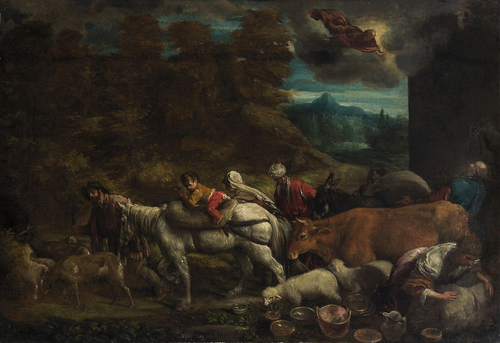




Wikidata link: [http://www.wikidata.org/entity/Q27978262](http://www.wikidata.org/entity/Q27978262)

Title: Q27978262

Creator: Girolamo da Ponte



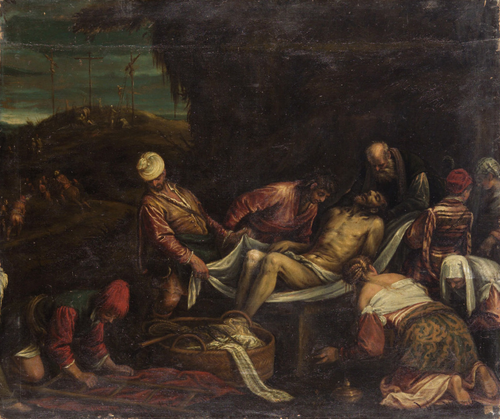

In [2]:
from SPARQLWrapper import SPARQLWrapper, JSON
from PIL import Image
import requests

# VARIABLES

sparql_endpoint_url = 'https://query.wikidata.org/bigdata/namespace/wdq/sparql'
wikibase_url = 'https://www.wikidata.org'
api_url = '/w/api.php'

# Wikidata requires a user agent header to prevent spam requests
user_agent = 'Ex_Books_conference_bot/0.0 (https://github.com/SimonXIX/Experimental_Books_workshop; ad7588@coventry.ac.uk)'

# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/

import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT ?item ?itemLabel ?inceptionyear ?creator ?creatorLabel ?image
WHERE
{
  ?item wdt:P31 wd:Q3305213 ;
        wdt:P195 wd:Q95569 ;
        wdt:P170 ?creator ;
        wdt:P18 ?image .

  OPTIONAL { ?item wdt:P571 ?inception. }
  FILTER(YEAR(?inception) >= 1500 && YEAR(?inception) < 1700)

  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
LIMIT 15
"""


# SUBROUTINES

def get_delay(date):
    try:
        date = datetime.datetime.strptime(date, '%a, %d %b %Y %H:%M:%S GMT')
        timeout = int((date - datetime.datetime.now()).total_seconds())
    except ValueError:
        timeout = int(date)
    return timeout

def get_image(url, headers):
    r = requests.get(url, headers=headers, stream=True)
    if r.status_code == 200:
        im = Image.open(r.raw)
        return im
    if r.status_code == 500:
        return None
    if r.status_code == 403:
        return None
    if r.status_code == 429:
        timeout = get_delay(r.headers['retry-after'])
        print('Timeout {} m {} s'.format(timeout // 60, timeout % 60))
        time.sleep(timeout)
        get_image(url, headers)

def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()

# MAIN PROGRAM

results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
    print('Wikidata link: ' + '[' + result['item']['value'] + ']' + '(' + result['item']['value'] + ')' + '\n')
    print('Title: ' + result['itemLabel']['value'] + '\n')
    print('Creator: ' + result['creatorLabel']['value'] + '\n')

    # get image from image URL and display resized version
    image_url=result['image']['value']
    headers = {'User-Agent': 'Ex_Books_conference_bot/0.0 (https://github.com/SimonXIX/Experimental_Books_workshop; ad7588@coventry.ac.uk)'}
    im = get_image(image_url, headers)
    im.thumbnail((500, 500), Image.Resampling.LANCZOS)
    display(im)
    print('\n\n')
